## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

### Dataset Loading

In [3]:
# Load Datasets
flights_df = os.getenv("flight_path")
hotels_df = os.getenv("hotel_path")
users_df = os.getenv("user_path")
flights_df = pd.read_csv(flights_df,on_bad_lines="skip")
hotels_df = pd.read_csv(hotels_df,on_bad_lines="skip")
users_df = pd.read_csv(users_df,on_bad_lines="skip")

### Dataset First View

In [4]:
# Dataset First Look
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [5]:
hotels_df.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10-10-2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12-12-2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [6]:
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Flights Dataset: {flights_df.shape[0]} rows, {flights_df.shape[1]} columns")
print(f"Hotels Dataset: {hotels_df.shape[0]} rows, {hotels_df.shape[1]} columns")
print(f"Users Dataset: {users_df.shape[0]} rows, {users_df.shape[1]} columns")

Flights Dataset: 271888 rows, 10 columns
Hotels Dataset: 40552 rows, 8 columns
Users Dataset: 1340 rows, 5 columns


### Dataset Information

In [8]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [9]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print(f"Flights Dataset Duplicates: {flights_df.duplicated().sum()}")
print(f"Hotels Dataset Duplicates: {hotels_df.duplicated().sum()}")
print(f"Users Dataset Duplicates: {users_df.duplicated().sum()}")

Flights Dataset Duplicates: 0
Hotels Dataset Duplicates: 0
Users Dataset Duplicates: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(f"Flights Dataset Missing Values: {flights_df.isnull().sum().sum()}")
print(f"Hotels Dataset Missing Values: {hotels_df.isnull().sum().sum()}")
print(f"Users Dataset Missing Values: {users_df.isnull().sum().sum()}")

Flights Dataset Missing Values: 0
Hotels Dataset Missing Values: 0
Users Dataset Missing Values: 0


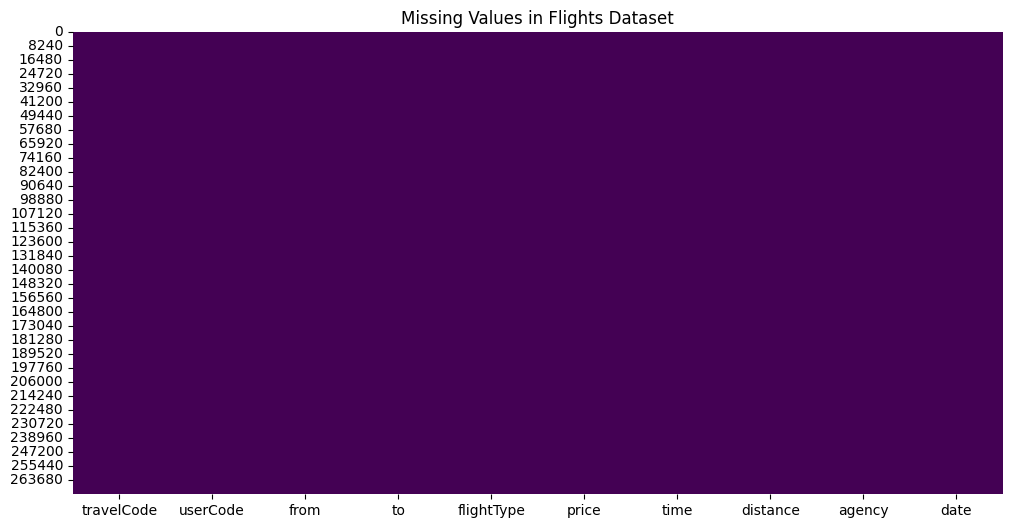

In [13]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flights_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flights Dataset')
plt.show()


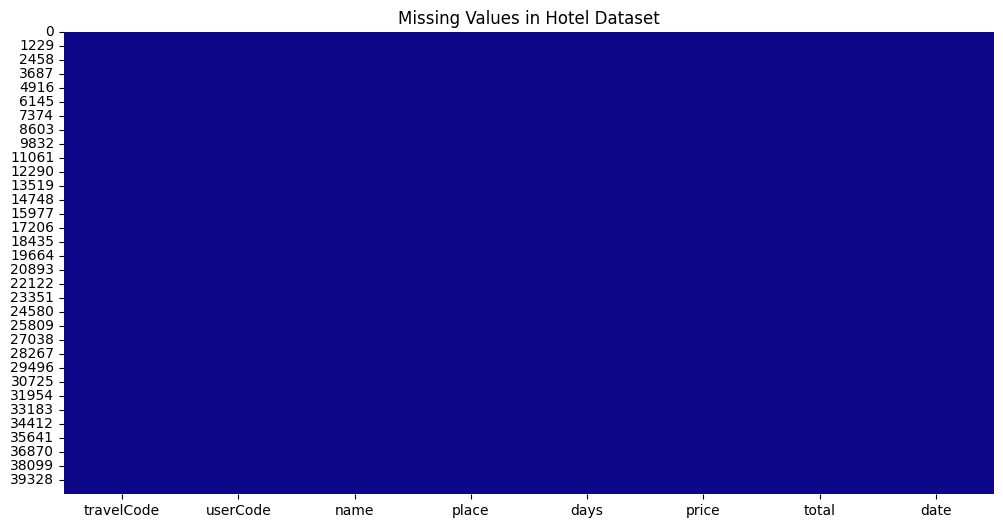

In [14]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(hotels_df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Values in Hotel Dataset')
plt.show()

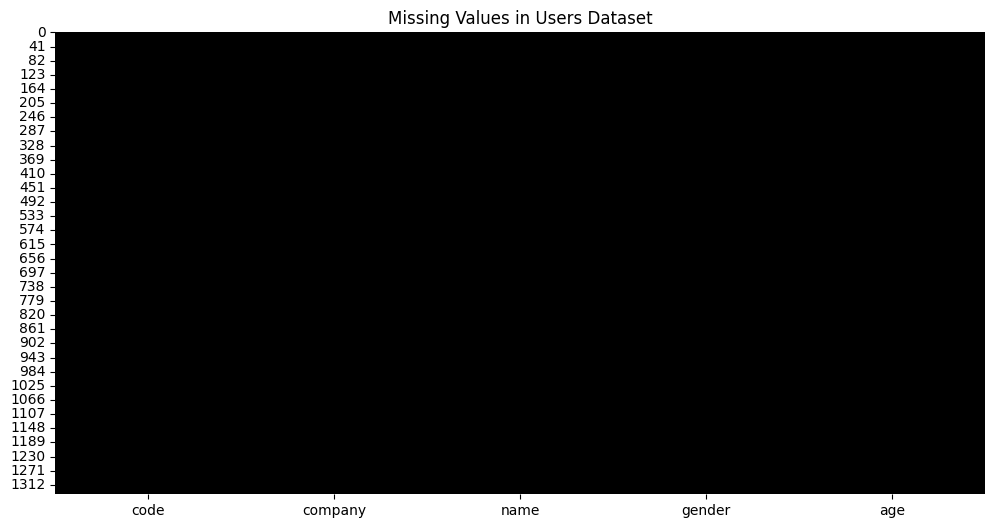

In [15]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(users_df.isnull(), cbar=False, cmap='grey')
plt.title('Missing Values in Users Dataset')
plt.show()

### What did you know about your dataset?

## Summary Statistics
| Dataset  | Record Count | Description |
|----------|-------------|-------------|
| **Flights** | 271,888 | Flight bookings with route, pricing, duration, and agency details |
| **Hotels**  | 40,552  | Hotel reservations linked to users and travel itineraries |
| **Users**   | 1,340   | Unique user profiles with demographic and company information |

## Key Characteristics
**Data Completeness**
   - No duplicate records exist in any dataset
   - No missing values across all fields

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
print("Flights Dataset Columns:", flights_df.columns.tolist())
print("Hotels Dataset Columns:", hotels_df.columns.tolist())
print("Users Dataset Columns:", users_df.columns.tolist())

Flights Dataset Columns: ['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time', 'distance', 'agency', 'date']
Hotels Dataset Columns: ['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total', 'date']
Users Dataset Columns: ['code', 'company', 'name', 'gender', 'age']


In [17]:
# Dataset Describe
print("Flights Dataset Description:\n", flights_df.describe())
print("-"*80)
print("Hotels Dataset Description:\n", hotels_df.describe())
print("-"*80)
print("Users Dataset Description:\n", users_df.describe())

Flights Dataset Description:
           travelCode       userCode         price           time       distance
count  271888.000000  271888.000000  271888.00000  271888.000000  271888.000000
mean    67971.500000     667.505495     957.37503       1.421147     546.955535
std     39243.724665     389.523127     362.31189       0.542541     208.851288
min         0.000000       0.000000     301.51000       0.440000     168.220000
25%     33985.750000     326.000000     672.66000       1.040000     401.660000
50%     67971.500000     659.000000     904.00000       1.460000     562.140000
75%    101957.250000    1011.000000    1222.24000       1.760000     676.530000
max    135943.000000    1339.000000    1754.17000       2.440000     937.770000
--------------------------------------------------------------------------------
Hotels Dataset Description:
           travelCode      userCode          days         price         total
count   40552.000000  40552.000000  40552.000000  40552.000000 

### Variables Description

## Flights Dataset  
Records flight booking details.  

| Field         | Type      | Description                                  |
|--------------|----------|--------------------------------------------|
| `travelCode` | `string` | Unique travel identifier (PK).             |
| `userCode`   | `string` | Links to `code` in **Users** (FK).         |
| `from`       | `string` | Departure city (e.g., "New York").         |
| `to`         | `string` | Arrival city (e.g., "London").             |
| `flightType` | `string` | Class (e.g., "Economy", "First Class").    |
| `price`      | `number` | Ticket price in USD.                       |
| `time`       | `number` | Flight duration in minutes.                |
| `distance`   | `number` | Distance in miles.                         |
| `agency`     | `string` | Booking agency (e.g., "SkyTravel").        |
| `date`       | `date`   | Departure date (YYYY-MM-DD).               |

---

## Hotels Dataset  
Stores hotel reservation data.  

| Field         | Type      | Description                                  |
|--------------|----------|--------------------------------------------|
| `travelCode` | `string` | Unique travel identifier (PK).             |
| `userCode`   | `string` | Links to `code` in **Users** (FK).         |
| `name`       | `string` | Hotel name (e.g., "Grand Hyatt").          |
| `place`      | `string` | Location (e.g., "Tokyo, Japan").           |
| `days`       | `number` | Duration of stay in days.                  |
| `price`      | `number` | Cost per day in USD.                       |
| `total`      | `number` | Total cost (`days * price`).               |
| `date`       | `date`   | Booking date (YYYY-MM-DD).                 |

---

## Users Dataset  
Contains user profile information.  

| Field    | Type      | Description                     |
|----------|----------|---------------------------------|
| `code`   | `string` | Unique user identifier (PK).    |
| `company`| `string` | Associated company.             |
| `name`   | `string` | Full name of the user.          |
| `gender` | `string` | Gender (e.g., "Male", "Female").|
| `age`    | `number` | Age in years.                   |

---

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print("Flights Dataset Unique Values:\n", flights_df.nunique())
print("-"*80)
print("Hotels Dataset Unique Values:\n", hotels_df.nunique())
print("-"*80)
print("Users Dataset Unique Values:\n", users_df.nunique())


Flights Dataset Unique Values:
 travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64
--------------------------------------------------------------------------------
Hotels Dataset Unique Values:
 travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
dtype: int64
--------------------------------------------------------------------------------
Users Dataset Unique Values:
 code       1340
company       5
name       1338
gender        3
age          45
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# Rename 'code' column in users_df to 'userCode' for consistency when merging
users_df = users_df.rename(columns={'code': 'userCode'})

In [20]:
# First merge flights and users on userCode
flight_user_df = pd.merge(flights_df, users_df, on='userCode', how='left')
print(f"Flights + Users merged shape: {flight_user_df.shape}")

Flights + Users merged shape: (271888, 14)


In [21]:
# Then merge with hotels on travelCode and userCode
merged_df = pd.merge(flight_user_df, hotels_df, on=['travelCode', 'userCode'], how='left')
print(f"Final merged dataset shape: {merged_df.shape}")

Final merged dataset shape: (271888, 20)


In [22]:
# Rename columns in merged_df for better understanding
merged_df = merged_df.rename(columns={
    'travelCode': 'Travel Code',
    'userCode': 'User Code',
    'from': 'Departure City',
    'to': 'Arrival City',
    'flightType': 'Flight Type',
    'price_x': 'Flight Price (USD)',
    'time': 'Flight Duration (hrs)',
    'distance': 'Flight Distance (miles)',
    'agency': 'Booking Agency',
    'date_x': 'Flight Date',
    'company': 'Company',
    'name_x': 'User Name',
    'gender': 'Gender',
    'age': 'Age',
    'name_y': 'Hotel Name',
    'place': 'Hotel Location',
    'days': 'Hotel Stay (days)',
    'price_y': 'Hotel Price/Day (USD)',
    'total': 'Hotel Total Cost (USD)',
    'date_y': 'Hotel Booking Date'
})

In [23]:
# Check unique values in categorical columns
print("Unique flight types:", merged_df['Flight Type'].unique())
print("Number of unique users:", merged_df['User Code'].nunique())
print("Number of unique travel codes:", merged_df['Travel Code'].nunique())

Unique flight types: ['firstClass' 'economic' 'premium']
Number of unique users: 1335
Number of unique travel codes: 135944


In [24]:
# Convert 'Flight Date' and 'Hotel Booking Date' columns to datetime format
merged_df['Flight Date'] = pd.to_datetime(merged_df['Flight Date'], errors='coerce', infer_datetime_format=True)
merged_df['Hotel Booking Date'] = pd.to_datetime(merged_df['Hotel Booking Date'], errors='coerce', infer_datetime_format=True)

### What all manipulations have you done and insights you found?

### Manipulations Done

1. Renamed 'code' column in users_df to 'userCode' for consistency and easier merging.
2. Renamed columns in merged_df for better understanding.
3. Merged flights_df with users_df on 'userCode' to combine flight and user information.
4. Merged the resulting dataframe with hotels_df on ['travelCode', 'userCode'] to integrate hotel booking details.
5. Checked for duplicates and missing values in all datasets to ensure data quality.
6. Explored unique values and summary statistics for all datasets to understand variable distributions and data types.
7. Converted 'Flight Date' and 'Hotel Booking Date' columns to datetime format

### Insights:
- No duplicate or missing values were found in the original datasets, indicating high data quality.
- The merged dataset provides a comprehensive view of user travel behavior, combining flight, hotel, and demographic data.
- There are significantly fewer hotel bookings than flight bookings, suggesting not all travelers book hotels through the same platform.
- The data is now ready for further analysis and visualization, enabling detailed exploration of travel patterns, pricing, and user demographics.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

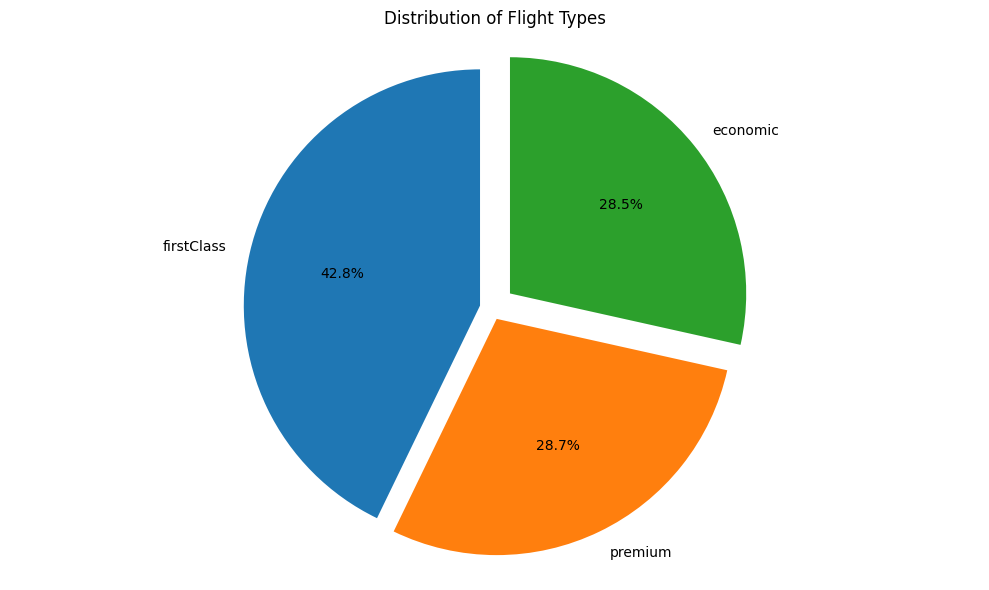

In [25]:
# Chart - 1 visualization code
# Flight Type Distribution
plt.figure(figsize=(10, 6))
flight_type_counts = merged_df['Flight Type'].value_counts()
plt.pie(flight_type_counts, 
        labels=flight_type_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0.05, 0.1))
plt.title('Distribution of Flight Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart effectively shows the proportion of each flight type in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- First class dominates with 42.8% of all flights
- Business class accounts for 28.7%
- Economy class makes up the smallest share at 28.5%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The dominance of first class bookings suggests a strong premium customer base, which could lead to increased focus on luxury services and partnerships.
- However, the relatively low share of economy class may indicate missed opportunities in the budget segment or a need to review pricing and accessibility.
- Understanding these proportions allows for better resource allocation, targeted promotions, and improved customer satisfaction, ultimately driving positive business impact.

#### Chart - 2

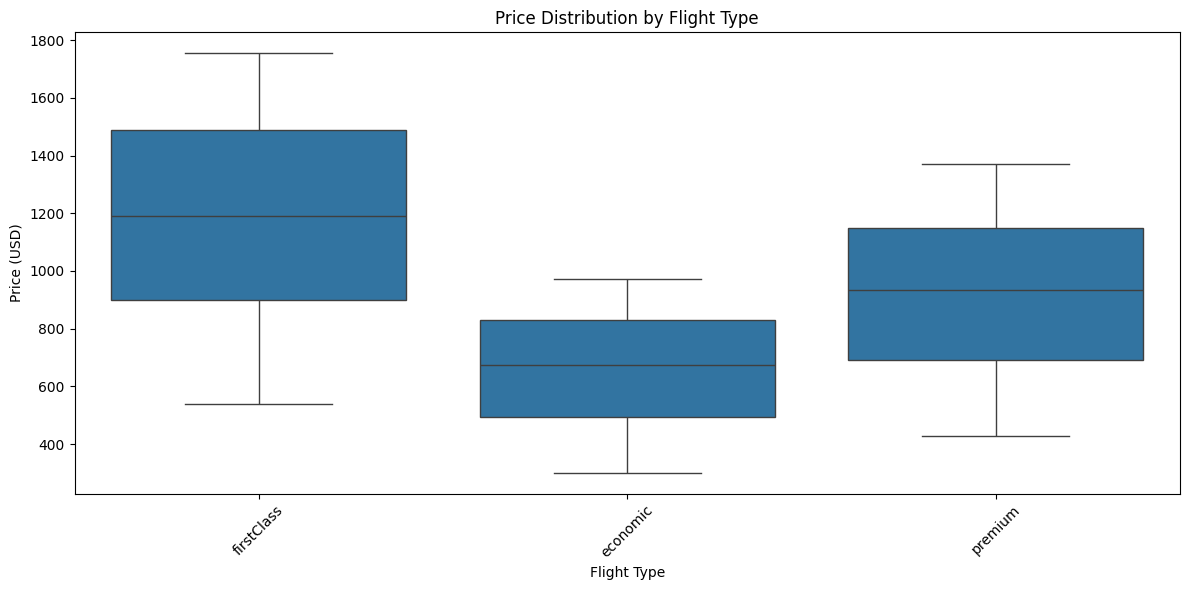

In [26]:
# Chart - 2 visualization code
# Price Distribution by Flight Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flight Type', y='Flight Price (USD)', data=merged_df)
plt.title('Price Distribution by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A boxplot is ideal for visualizing the distribution, spread, and outliers of flight prices across different flight types. It allows for easy comparison of median prices, interquartile ranges, and the presence of extreme values among the categories, which is essential for understanding pricing strategies and customer segmentation.

##### 2. What is/are the insight(s) found from the chart?

- The boxplot reveals that firstClass flights have the highest median and overall price range. Premium flights are priced lower than firstClass but higher than economic, showing a moderate spread. Economic flights have the lowest median price and a tighter distribution, indicating more consistent pricing. This highlights clear segmentation in pricing strategies across flight types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights from the boxplot can help create a positive business impact. By understanding the price segmentation across flight types, the company can optimize its pricing strategy, target marketing efforts to specific customer segments, and identify opportunities for upselling or bundling services. If outliers or large price spreads are observed, it may indicate inconsistent pricing or potential customer dissatisfaction, which can be addressed to improve competitiveness and customer loyalty. Conversely, if premium segments are overpriced relative to their value, it could lead to negative growth due to lost customers, so regular analysis is essential for maintaining a balanced and profitable pricing structure.

#### Chart - 3

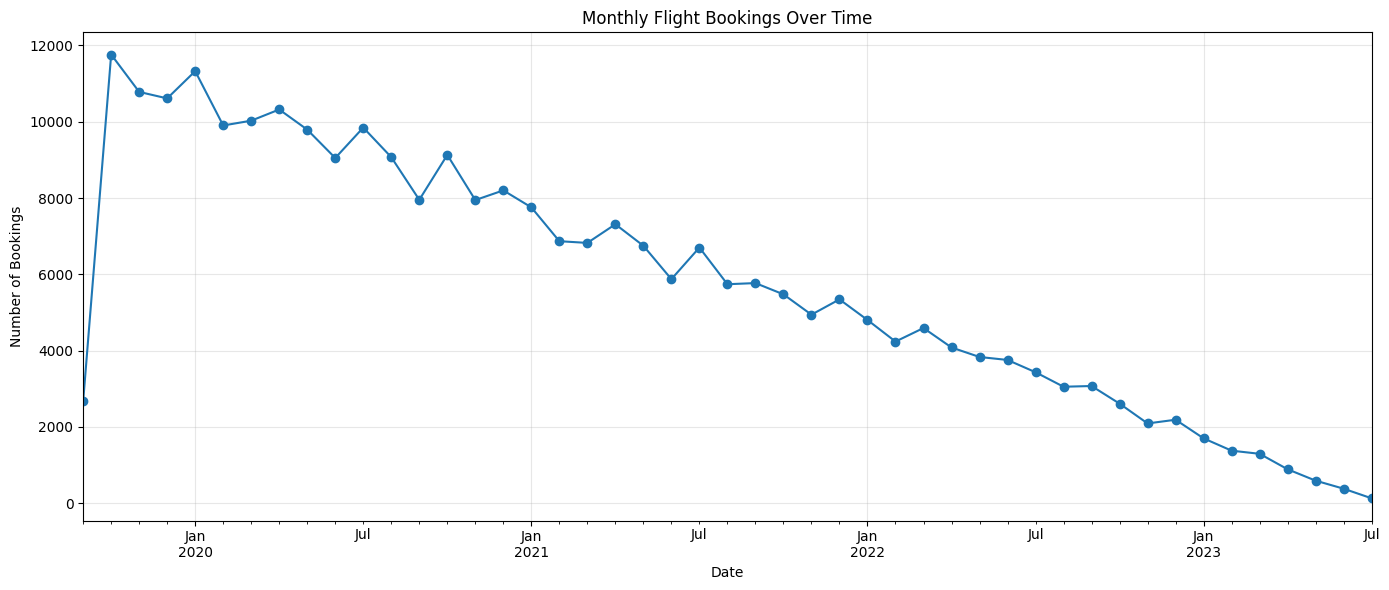

In [27]:
# Chart - 3 visualization code
# Booking Trend Over Time
plt.figure(figsize=(14, 6))
monthly_bookings = merged_df.resample('M', on='Flight Date').size()
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Flight Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A line chart is ideal for visualizing trends over time. By plotting the number of bookings per month, we can easily observe seasonality, growth, or decline in flight bookings, and identify any significant changes or anomalies in booking patterns.

##### 2. What is/are the insight(s) found from the chart?

- The line chart shows a clear seasonality in flight bookings, with noticeable peaks and troughs throughout each year. There is a significant surge in bookings around the end of 2019 and early 2020, likely due to holiday travel. However, starting from March 2020, there is a sharp decline in bookings, which aligns with the onset of the COVID-19 pandemic and related travel restrictions. After this drop, bookings gradually recover but never reach pre-pandemic levels, indicating a lasting impact on travel behavior. The trend also shows a steady decline towards the later months, suggesting either ongoing external factors or a shift in customer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights from Chart can help create a positive business impact. By identifying the seasonality and the sharp decline in bookings during the COVID-19 pandemic, the company can better plan for demand fluctuations, optimize resource allocation, and develop targeted marketing strategies during peak and off-peak periods. Recognizing the lasting impact of external events (like the pandemic) also allows the business to build more resilient contingency plans and adapt its offerings to changing customer behaviors. However, the observed decline in bookings post-pandemic highlights a risk of negative growth if not addressed, emphasizing the need for innovation, customer engagement, and possibly diversification to recover and sustain business performance.

#### Chart - 4

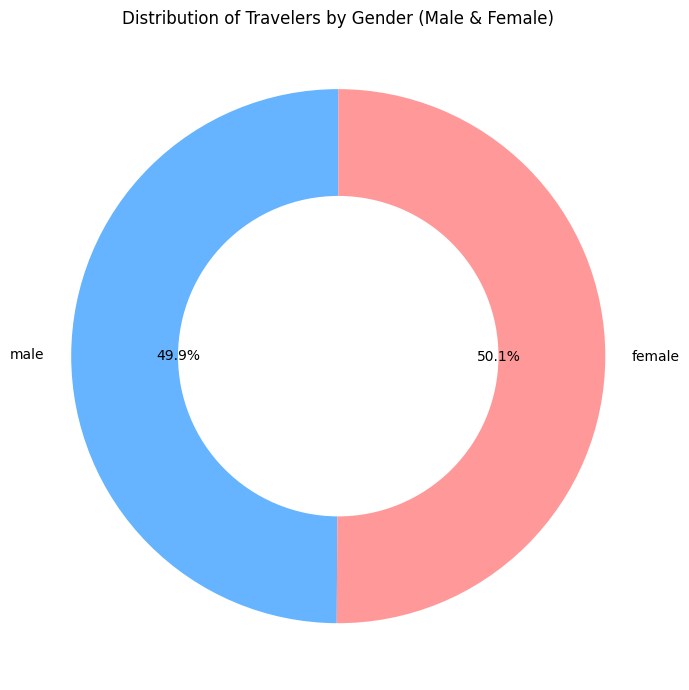

In [28]:
# Chart - 4 visualization code
gender_counts = merged_df['Gender'].value_counts()
# Filter only 'male' and 'female'
gender_counts = gender_counts.loc[['male', 'female']]

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Travelers by Gender (Male & Female)')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A donut pie chart was chosen because it visually emphasizes the proportion of male and female travelers in the dataset, making it easy to compare their relative frequencies at a glance. The donut style also allows for clear labeling and a modern presentation, which is effective for categorical gender distribution analysis.

##### 2. What is/are the insight(s) found from the chart?

- The chart shows that the distribution of travelers is nearly equal between males and females, with each gender representing about half of the total travelers. This indicates a balanced gender participation in travel bookings, suggesting that travel services and marketing strategies should be inclusive and cater equally to both male and female customers. There is no significant gender bias in the dataset, which is a positive sign for business diversity and outreach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights from Chart can help create a positive business impact. The nearly equal distribution of male and female travelers suggests that marketing campaigns and service offerings should be designed to appeal to both genders equally, maximizing reach and engagement. This balance also indicates no significant gender bias in the customer base, supporting inclusive business strategies. There are no insights from this chart that suggest negative growth; instead, it highlights an opportunity to maintain and further enhance gender-inclusive practices, which can strengthen brand reputation and customer loyalty.

#### Chart - 5

<Figure size 1000x600 with 0 Axes>

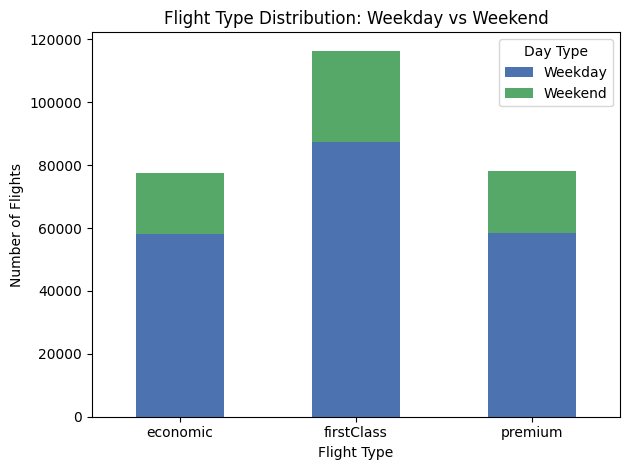

In [29]:
# Chart - 5 visualization code
# Flight Type by Weekend/Weekday
# Create a new column to indicate 'Weekday' or 'Weekend' for each flight
merged_df['Day Type'] = merged_df['Flight Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Create a crosstab to count flights by Flight Type and Day Type
flight_daytype_ct = pd.crosstab(merged_df['Flight Type'], merged_df['Day Type'])

# Plot the results
plt.figure(figsize=(10, 6))
flight_daytype_ct.plot(kind='bar', stacked=True, color=['#4C72B0', '#55A868'])
plt.title('Flight Type Distribution: Weekday vs Weekend')
plt.xlabel('Flight Type')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A stacked bar chart was chosen because it clearly compares the distribution of each flight type (economic, premium, firstClass) across weekdays and weekends. This format makes it easy to see both the total volume and the relative proportions for each category, helping to identify patterns in customer preferences based on the day of travel.

##### 2. What is/are the insight(s) found from the chart?

- The chart shows that for all flight types (economic, premium, firstClass), the majority of bookings occur on weekdays rather than weekends.
- FirstClass flights have the highest volume on both weekdays and weekends, but the weekday-to-weekend ratio is consistent across all classes.
- Economic and premium flights also follow this trend, with significantly more bookings on weekdays.
- This suggests that most travel, regardless of class, is business-related or scheduled during the workweek, while leisure or personal travel (typically on weekends) is less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights from chart can help create a positive business impact. The finding that most flights, regardless of class, are booked on weekdays suggests a strong business travel segment. This allows the company to tailor weekday promotions, loyalty programs, and premium services to business travelers, maximizing revenue during peak periods. Conversely, the lower volume on weekends highlights an opportunity to introduce special offers or packages to stimulate leisure travel and increase weekend occupancy. There are no immediate signs of negative growth, but failing to address the weekend gap could mean missed revenue opportunities. By leveraging these insights, the business can optimize pricing, marketing, and resource allocation to drive growth across both segments.

#### Chart - 6

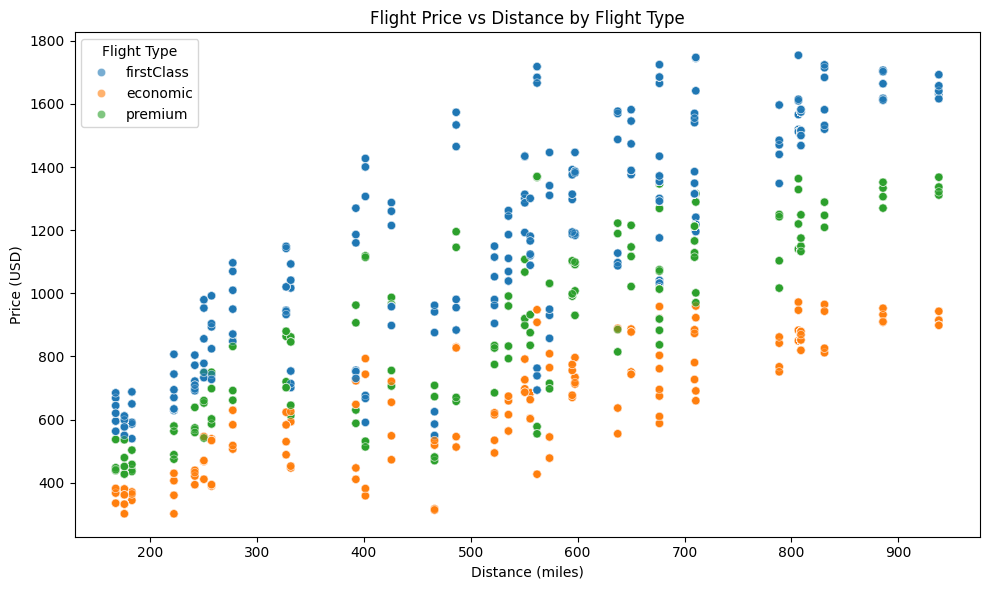

In [30]:
# Chart - 6 visualization code
# Scatter Plot of Price vs Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance (miles)', y='Flight Price (USD)', 
               hue='Flight Type', data=merged_df, alpha=0.6)
plt.title('Flight Price vs Distance by Flight Type')
plt.xlabel('Distance (miles)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- A scatter plot was chosen because it effectively visualizes the relationship between two continuous variables: flight distance and flight price. By using color to distinguish flight types, the chart allows us to observe how pricing varies with distance for each class, identify trends, clusters, and potential outliers, and compare the pricing strategies across different flight types in a single view.

##### 2. What is/are the insight(s) found from the chart?

- The scatter plot shows a clear positive correlation between flight distance and flight price across all flight types.
- FirstClass flights consistently have higher prices for similar distances compared to premium and economic classes.
- Economic flights cluster at lower price points, even for longer distances, indicating budget-friendly pricing.
- Premium flights occupy a middle range, both in price and distance.
- There are some outliers, especially in FirstClass, where prices are exceptionally high for certain distances.
- Overall, the chart highlights distinct pricing strategies for each flight type and confirms that distance is a strong driver of price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The scatter plot in chart reveals a strong positive correlation between flight distance and price, with clear segmentation by flight type.
- This insight enables the business to:
- - Optimize pricing strategies by ensuring prices scale appropriately with distance for each class.
- - Identify and address outliers (e.g., unusually high prices for certain distances in FirstClass) to improve customer trust and satisfaction.
- - Target marketing and upselling efforts based on distance and preferred flight type, maximizing revenue from premium customers.
- - Maintain competitive pricing for economic flights to attract price-sensitive travelers.

- There are no immediate signs of negative growth, but if price outliers are not managed, it could lead to customer dissatisfaction and lost sales.
- Regular analysis ensures pricing remains fair and competitive, supporting sustainable business growth.

#### Chart - 7

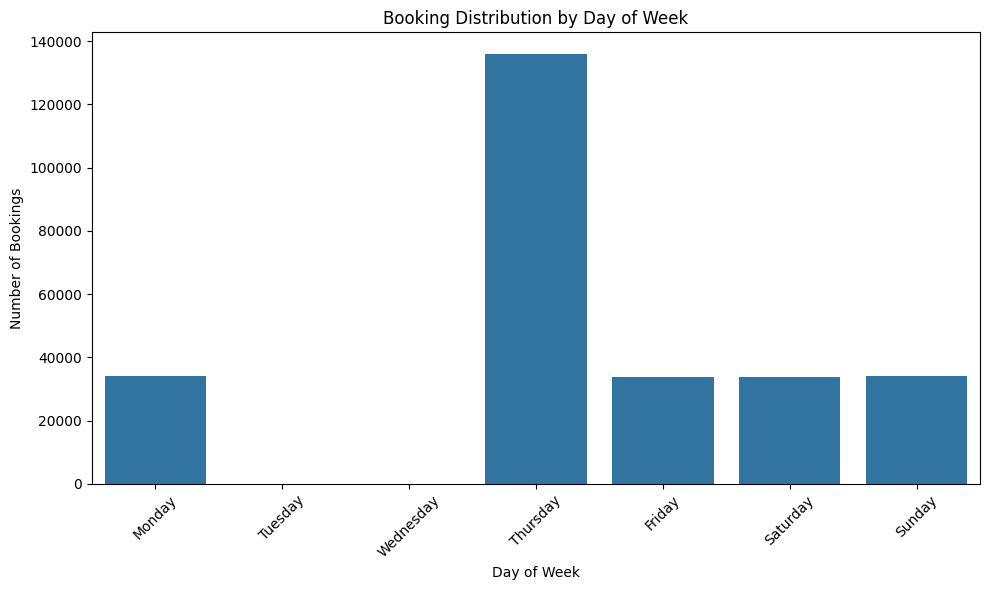

In [31]:
# Chart - 7 visualization code
# Booking Distribution by Day of Week
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['day_name'] = merged_df['Flight Date'].dt.day_name()
day_counts = merged_df['day_name'].value_counts().reindex(day_order)
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Booking Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- This chart was chosen because bar charts are ideal for comparing discrete categories (days) and visualizing which days have higher or lower booking volumes.

##### 2. What is/are the insight(s) found from the chart?

- The insight from chart is that Thursday has the highest number of bookings, while Tuesday and Wednesday have very few or no bookings recorded (possibly due to missing or incomplete data).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights from chart  can help create a positive business impact by revealing booking patterns across the week.
- For example, the highest number of bookings occurs on Thursday, while Tuesday and Wednesday have very few or no bookings.
- This information allows the business to:
- - Focus marketing campaigns and special offers on low-booking days to boost sales.
- - Optimize staffing and resource allocation for peak days like Thursday.
- - Investigate and address any data quality issues for missing days to ensure accurate analysis.
- There are no direct insights suggesting negative growth, but if the low bookings on certain days are due to operational issues or customer dissatisfaction, it could impact revenue.
- Addressing these gaps and leveraging peak days can help sustain and grow the business.

#### Chart - 8

<Figure size 1200x600 with 0 Axes>

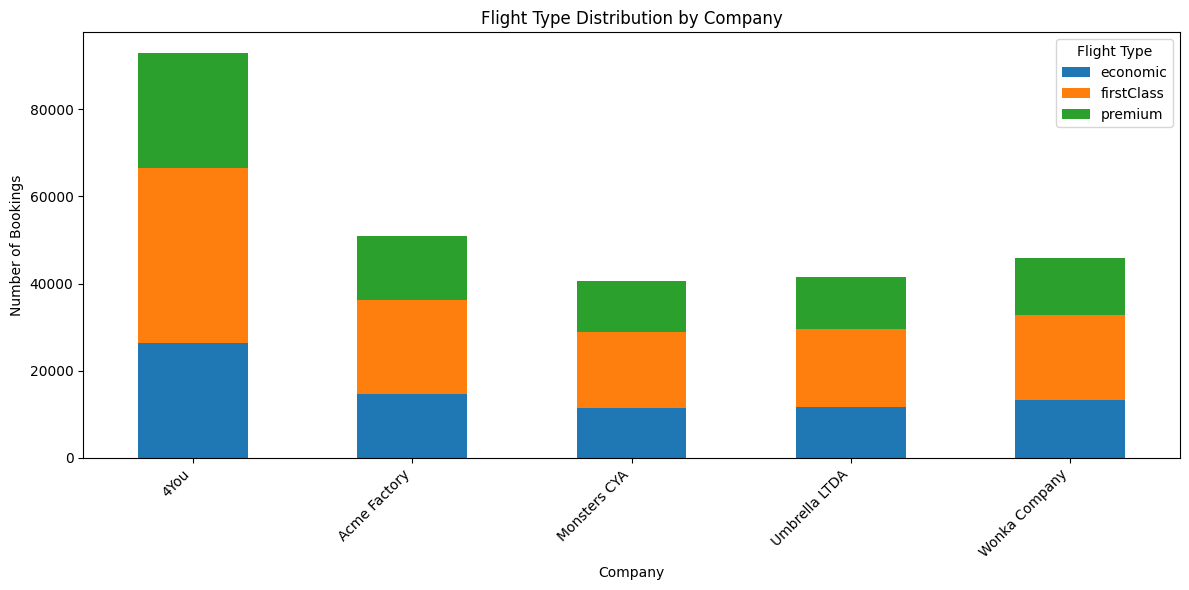

In [33]:
# Chart - 8 visualization code
#  Stacked Bar Chart of Flight Types by Company
plt.figure(figsize=(12, 6))
cross_company = pd.crosstab(merged_df['Company'], merged_df['Flight Type'])
cross_company.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Flight Type Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Flight Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- This chart was chosen because it allows for a clear comparison of how different companie's bookings are distributed across flight classes.

##### 2. What is/are the insight(s) found from the chart?

- This chart reveals that certain companies have a higher preference for firstClass flights, while others book more economic or premium flights.
- For example, '4You' and 'Wonka Company' have a larger share of firstClass bookings, indicating a premium travel policy or higher travel budgets.
- In contrast, 'Acme Factory' and 'Monsters CYA' show a more balanced or economic-focused distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights from this chart can help create a positive business impact by revealing which companies prefer premium or first class flights.
- This allows the business to:
- - Target high-value companies with tailored premium offerings, loyalty programs, or exclusive deals.
- - Identify companies with mostly economic bookings and create upsell strategies.
- - Optimize corporate partnerships and resource allocation based on company travel preferences.
- There are no immediate signs of negative growth, but ignoring these patterns could mean missed revenue opportunities from both premium and budget segments.

#### Chart - 9 - Correlation Heatmap

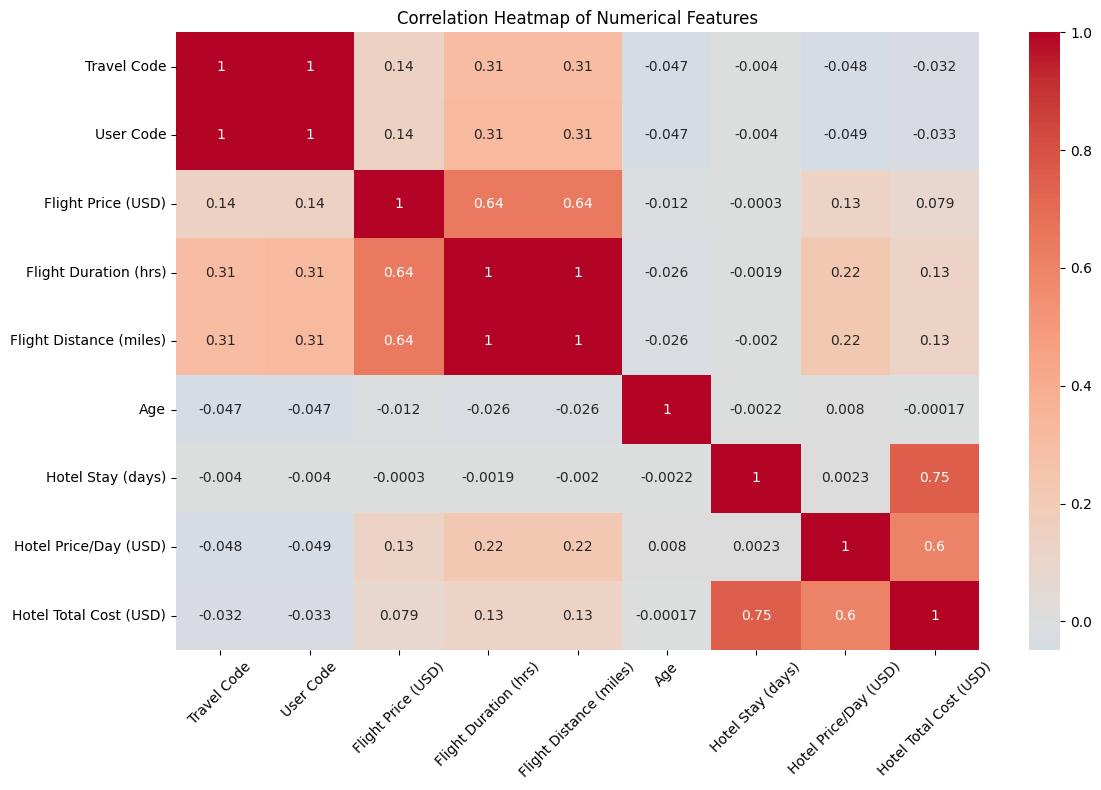

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Correlation Heatmap was chosen because it provides a comprehensive overview of the linear relationships between all numerical features in the dataset. 
- This visualization helps quickly identify which variables are strongly correlated (positively or negatively).

##### 2. What is/are the insight(s) found from the chart?

##### Insights from the Correlation Heatmap

- **Strong Positive Correlations:**
    - `Flight Duration (hrs)` and `Flight Distance (miles)` are almost perfectly correlated (1), indicating that longer flights cover more distance as expected.
    - `Hotel Stay (days)` and `Hotel Total Cost (USD)` show a strong positive correlation (0.75), since total cost is directly influenced by the number of days stayed.
    - `Hotel Price/Day (USD)` and `Hotel Total Cost (USD)` also have a high correlation (0.60), reflecting that higher daily rates increase the total cost.

- **Moderate Correlations:**
    - `Flight Price (USD)` is moderately correlated with both `Flight Duration (hrs)` (0.64) and `Flight Distance (miles)` (0.64), suggesting that longer and farther flights tend to be more expensive.
    - `Hotel Price/Day (USD)` has a moderate correlation with `Flight Duration (hrs)` (0.22) and `Flight Distance (miles)` (0.22), possibly indicating that longer trips may be associated with higher hotel prices.

- **Weak or No Correlation:**
    - `Age` shows very weak or negligible correlation with all other variables, suggesting that user age does not significantly impact flight or hotel costs, durations, or distances in this dataset.

- **Business Implications:**
    - The heatmap confirms expected relationships (e.g., distance and duration, hotel stay and total cost), validating data quality.
    - Moderate correlations between flight price, distance, and duration can inform pricing strategies and help identify potential outliers or anomalies.
    - Lack of correlation between age and travel costs suggests that pricing and marketing strategies may not need to be age-specific.

Overall, the correlation heatmap provides a quick overview of how numerical features interact, helping guide further analysis and business decisions.

#### Chart - 10 - Pair Plot

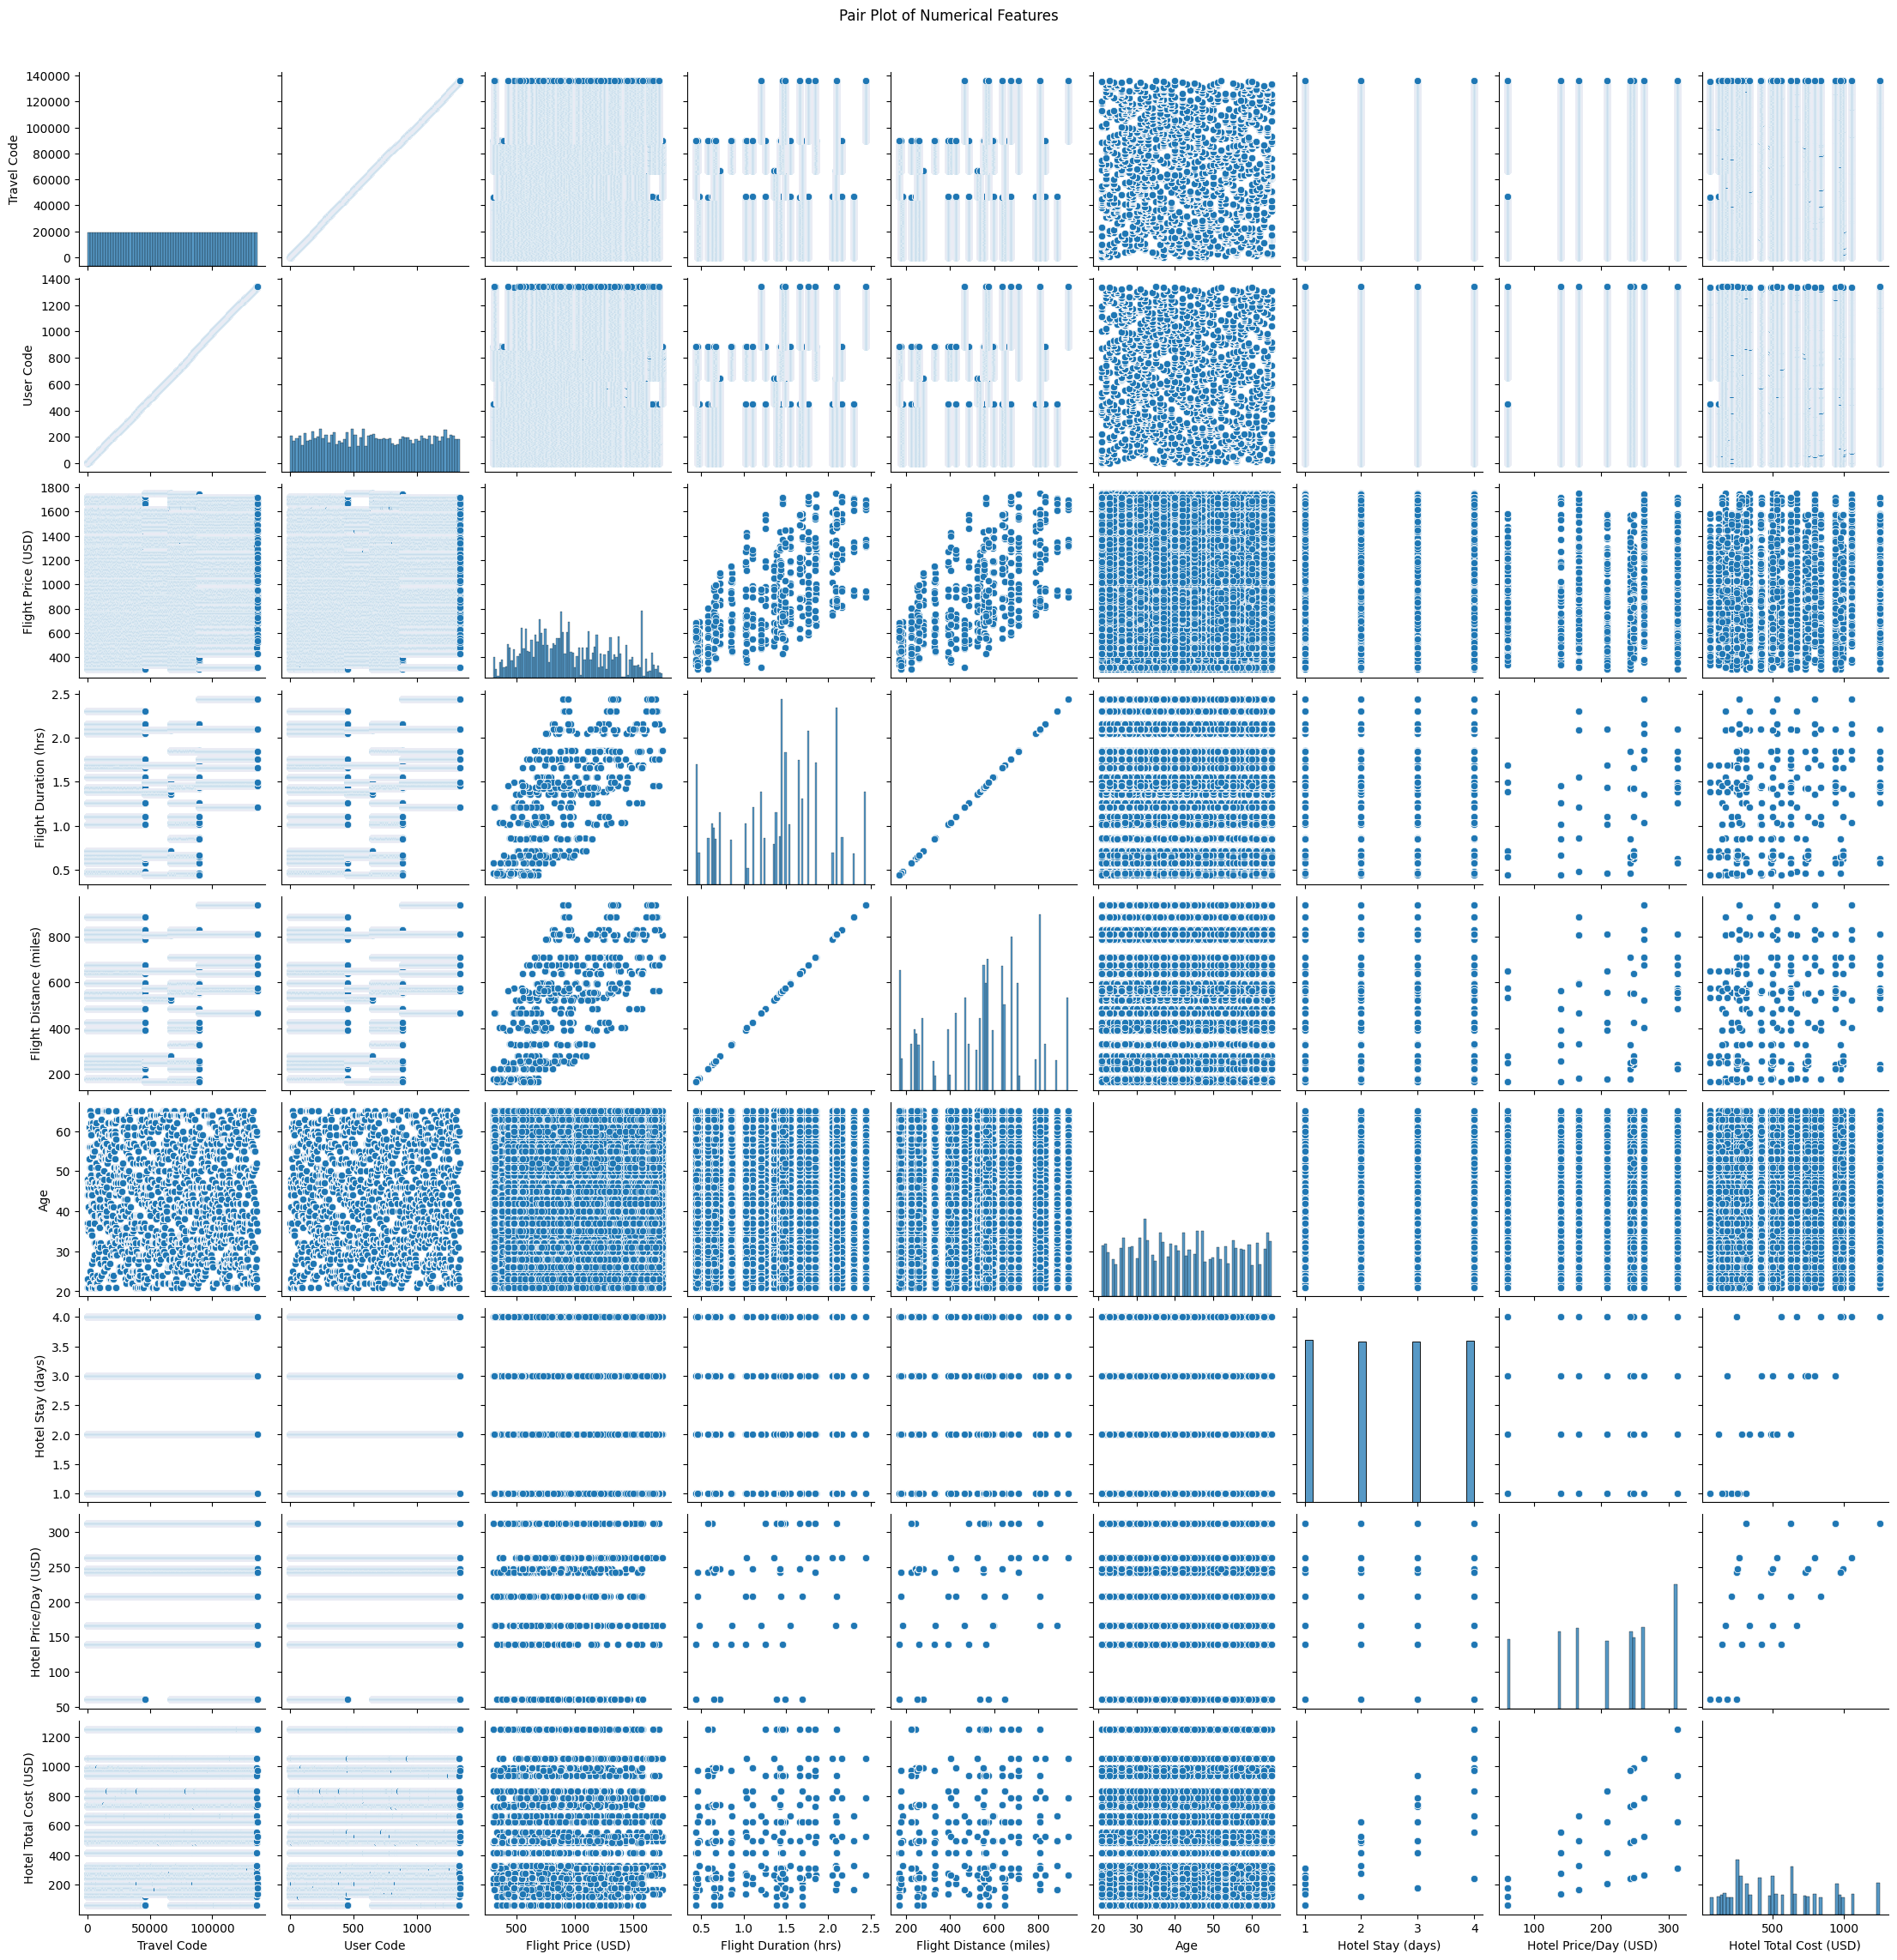

In [35]:
# Pair Plot visualization code
# Select only numeric columns for the pairplot
sns.pairplot(merged_df[numeric_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

- A pair plot was chosen because it provides a comprehensive visualization of the relationships between all pairs of numerical variables in the dataset. It allows us to quickly identify trends, correlations, clusters, and potential outliers across multiple features at once. This is especially useful for exploratory data analysis and for detecting patterns that may not be visible in single-variable charts.

##### 2. What is/are the insight(s) found from the chart?

#### Key insights:
- - Strong positive linear relationships are visible between 'Flight Duration (hrs)' and 'Flight Distance (miles)', and between 'Hotel Stay (days)' and 'Hotel Total Cost (USD)', confirming the findings from the correlation heatmap.
- - 'Flight Price (USD)' shows a moderate positive correlation with both 'Flight Duration (hrs)' and 'Flight Distance (miles)', indicating that longer and farther flights tend to be more expensive.
- - Most variables, such as 'Age', do not show strong relationships with travel costs or durations, suggesting demographic features may not be primary drivers of price or duration.
- - The scatter plots reveal the presence of outliers, especially in flight and hotel prices, which may warrant further investigation.
- - The distributions along the diagonal help identify skewness or multimodality in variables like 'Flight Price (USD)' and 'Hotel Total Cost (USD)'.

- Overall, the pair plot validates the main correlations, highlights variable distributions, and helps spot outliers or clusters, supporting robust exploratory data analysis.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

### 1. There is a significant difference in the average flight price among different flight types (economic, premium, firstClass).

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
# Perform one-way ANOVA to test if average flight price differs among flight types
f_stat, p_value = f_oneway(
    merged_df.loc[merged_df['Flight Type'] == 'economic', 'Flight Price (USD)'],
    merged_df.loc[merged_df['Flight Type'] == 'premium', 'Flight Price (USD)'],
    merged_df.loc[merged_df['Flight Type'] == 'firstClass', 'Flight Price (USD)']
)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4e}")

F-statistic: 76521.95
P-value: 0.0000e+00


##### Which statistical test have you done to obtain P-Value?

- The statistical test performed to obtain the P-value is a one-way ANOVA (Analysis of Variance).
- This test is used to determine if there are statistically significant differences between the means of three or more independent groups.

##### Why did you choose the specific statistical test?

- The one-way ANOVA test was chosen because it is specifically designed to compare the means of three or more independent groups.
- In this case, we want to determine if there is a statistically significant difference in the average flight price among the three flight types: economic, premium, and firstClass.
- ANOVA tests whether at least one group mean is different from the others, making it appropriate for this scenario.

### Hypothetical Statement - 2

#### 2. The proportion of weekday bookings is higher than weekend bookings for all flight types.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
# Perform Chi-Square Test to check if flight type is independent of day type
# Use the cross_tab (or flight_daytype_ct) table for observed frequencies
flight_daytype_ct = pd.crosstab(merged_df['Flight Type'], merged_df['Day Type'])

chi2, p, dof, expected = chi2_contingency(flight_daytype_ct)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4e}")
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 2.55
P-value: 2.7988e-01
Degrees of freedom: 2
Expected frequencies:
 [[58104.05870064 19361.94129936]
 [87320.35093862 29097.64906138]
 [58507.59036074 19496.40963926]]


##### Which statistical test have you done to obtain P-Value?

- The statistical test performed to obtain the P-value is the Chi-Square Test of Independence.
- This test checks whether there is a significant association between two categorical variables:
- in this case, 'Flight Type' and 'Day Type' (Weekday/Weekend).

##### Why did you choose the specific statistical test?

- The Chi-Square Test of Independence was chosen because both 'Flight Type' and 'Day Type' (Weekday/Weekend) are categorical variables. This test determines whether there is a significant association between the two variables, i.e., if the distribution of bookings across weekdays and weekends is independent of flight type. It is appropriate for testing relationships between categorical features in contingency tables.

### Hypothetical Statement - 3

## 3. The average hotel total cost differs significantly between companies.

#### 2. Perform an appropriate statistical test.

In [38]:
# Bin hotel total cost into categories
cost_bins = pd.qcut(merged_df['Hotel Total Cost (USD)'].dropna(), q=4, labels=['Low', 'Medium', 'High', 'Very High'])
# Assign binned categories back to the dataframe
merged_df.loc[~merged_df['Hotel Total Cost (USD)'].isna(), 'Cost Category'] = cost_bins

# Create a contingency table: Company vs. Cost Category
contingency = pd.crosstab(merged_df['Company'], merged_df['Cost Category'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4e}")
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 736.60
P-value: 6.4028e-150
Degrees of freedom: 12
Expected frequencies:
 [[7098.23337936 7014.60278161 7117.58591438 6797.57792464]
 [3882.40037483 3836.65836457 3892.98530282 3717.95595778]
 [3007.65732886 2972.22144407 3015.85736832 2880.26385875]
 [3155.05178536 3117.87931545 3163.65367923 3021.41521996]
 [3396.65713158 3356.6380943  3405.91773525 3252.78703886]]


##### Which statistical test have you done to obtain P-Value?

- This test checks whether there is a significant association between 'Company' and 'Cost Category' (binned hotel total cost).
- The statistical test performed to obtain the P-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

- This test determines whether there is a significant association between the company and the distribution of hotel cost categories, which is relevant for testing if average hotel total cost differs significantly between companies. It is appropriate for analyzing relationships between categorical variables in a contingency table.